## पांडा्सचे मूलभूत उदाहरणे

हा नोटबुक तुम्हाला पांडा्सच्या काही अतिशय मूलभूत संकल्पनांमधून मार्गदर्शन करेल. आपण सर्वप्रथम सामान्य डेटा सायन्स लायब्ररी आयात करण्यापासून सुरुवात करू:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### मालिका

मालिका ही यादी किंवा 1D-अॅरेसारखी असते, परंतु त्यात अनुक्रमणिका (index) असते. सर्व क्रिया अनुक्रमणिकेशी संरेखित (aligned) असतात.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


सिरीजचा एक सामान्य उपयोग म्हणजे **टाइम सिरीज**. टाइम सिरीजमध्ये, इंडेक्सला एक विशेष रचना असते - सामान्यतः तारखा किंवा डेटटाइम्सची श्रेणी. आपण `pd.date_range` वापरून अशी इंडेक्स तयार करू शकतो.

समजा आपल्याकडे अशी एक सिरीज आहे जी दररोज खरेदी केलेल्या उत्पादनाचे प्रमाण दर्शवते, आणि आपल्याला माहित आहे की प्रत्येक रविवारी आपल्याला स्वतःसाठी एक वस्तू घ्यावी लागते. सिरीज वापरून हे कसे मॉडेल करायचे ते येथे दिले आहे:


Length of index is 366


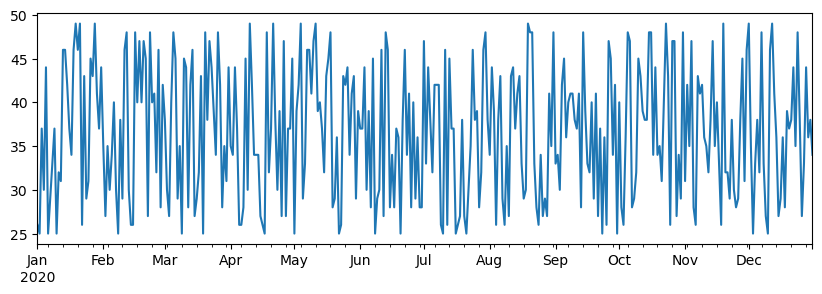

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


जसे तुम्ही पाहू शकता, येथे आम्हाला समस्या येत आहेत, कारण साप्ताहिक मालिकेत उल्लेख न केलेले दिवस गहाळ (`NaN`) मानले जातात, आणि `NaN` मध्ये संख्या जोडल्यास आपल्याला `NaN` मिळते. योग्य परिणाम मिळवण्यासाठी, मालिका जोडताना आपल्याला `fill_value` निर्दिष्ट करणे आवश्यक आहे:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


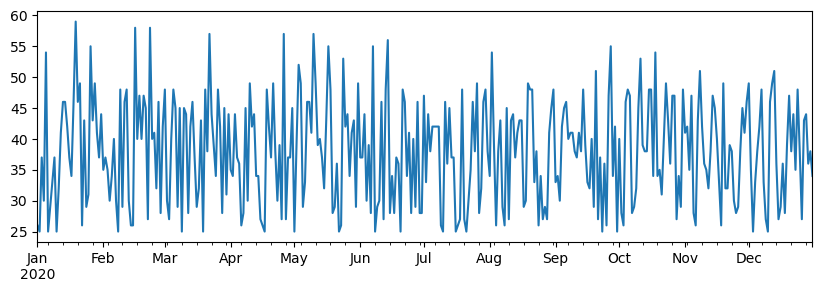

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

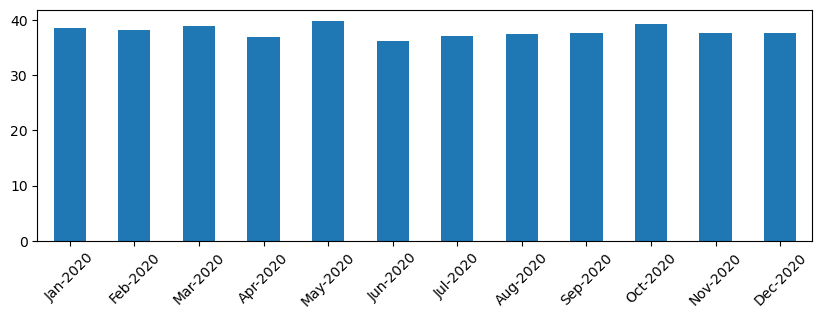

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## डेटा फ्रेम

डेटा फ्रेम म्हणजे मूलत: समान अनुक्रमणिका असलेल्या अनेक सिरीजचा संग्रह असतो. आपण अनेक सिरीज एकत्र करून डेटा फ्रेम तयार करू शकतो. वरीलप्रमाणे परिभाषित केलेल्या `a` आणि `b` सिरीज दिल्यास:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

आम्ही स्तंभ म्हणून मालिकांचा देखील वापर करू शकतो आणि शब्दकोशाचा वापर करून स्तंभांची नावे निर्दिष्ट करू शकतो:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

तोच परिणाम ट्रान्सपोज करून (आणि नंतर स्तंभांचे नाव बदलून, मागील उदाहरणाशी जुळण्यासाठी) साध्य केला जाऊ शकतो:


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

डेटाफ्रेममधून **स्तंभ निवडणे** अशा प्रकारे केले जाऊ शकते:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


फिल्टर अभिव्यक्तीच्या आधारे **पंक्ती निवडणे**:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

असे कार्य करते की `df['A']<5` हा अभिव्यक्ती एक बूलियन श्रेणी परत करते, जी दर्शवते की श्रेणीतील प्रत्येक घटकासाठी अभिव्यक्ती `True` किंवा `False` आहे का. जेव्हा श्रेणीचा निर्देशांक म्हणून वापर केला जातो, तेव्हा ती DataFrame मधील पंक्तींचा उपसंच परत करते. त्यामुळे यादृच्छिक Python बूलियन अभिव्यक्ती वापरणे शक्य नाही, उदाहरणार्थ, `df[df['A']>5 and df['A']<7]` असे लिहिणे चुकीचे ठरेल. त्याऐवजी, तुम्ही बूलियन श्रेणीवर विशेष `&` ऑपरेशन वापरले पाहिजे:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**नवीन गणनीय स्तंभ तयार करणे**. अंतर्ज्ञानी अभिव्यक्तींचा वापर करून आपण सहजपणे आपल्या DataFrame साठी नवीन गणनीय स्तंभ तयार करू शकतो. खालील कोड A च्या सरासरी मूल्यापासून त्याचे विचलन गणना करतो.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

आम्ही प्रत्यक्षात एक श्रेणी मोजत आहोत आणि नंतर ही श्रेणी डाव्या बाजूला असाइन करत आहोत, ज्यामुळे आणखी एक स्तंभ तयार होतो.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

संख्या आधारित पंक्ती निवडणे `iloc` संरचनेचा वापर करून केले जाऊ शकते. उदाहरणार्थ, DataFrame मधून पहिल्या 5 पंक्ती निवडण्यासाठी:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**गट بندی** प्रामुख्याने Excel मधील *पिव्होट टेबल्स* सारखा परिणाम मिळवण्यासाठी वापरली जाते. समजा आपल्याला `LenB` च्या प्रत्येक दिलेल्या संख्येसाठी स्तंभ `A` चे सरासरी मूल्य गणना करायचे आहे. मग आपण आपला DataFrame `LenB` नुसार गटबद्ध करू शकतो आणि `mean` कॉल करू शकतो:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

जर आपल्याला गटातील सरासरी आणि घटकांची संख्या मोजायची असेल, तर आपण अधिक जटिल `aggregate` फंक्शन वापरू शकतो:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## प्रिंटिंग आणि प्लॉटिंग

डेटा सायंटिस्टला अनेकदा डेटाचा अभ्यास करावा लागतो, त्यामुळे तो दृश्य स्वरूपात सादर करणे महत्त्वाचे ठरते. जेव्हा DataFrame मोठा असतो, तेव्हा बऱ्याच वेळा आपण फक्त खात्री करायची असते की आपण सर्वकाही योग्य करत आहोत, यासाठी सुरुवातीच्या काही रांगा प्रिंट करून पाहतो. हे `df.head()` कॉल करून करता येते. जर तुम्ही हे Jupyter Notebook वर चालवत असाल, तर ते DataFrame एक छान टेबल स्वरूपात प्रिंट करेल.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

आम्ही काही स्तंभांचे दृश्यांकन करण्यासाठी `plot` फंक्शनचा वापर देखील पाहिला आहे. `plot` अनेक कार्यांसाठी खूप उपयुक्त आहे आणि `kind=` पॅरामीटरद्वारे अनेक वेगवेगळ्या प्रकारचे ग्राफ्स समर्थित करते, परंतु काहीतरी अधिक जटिल प्लॉट करण्यासाठी तुम्ही नेहमीच मूळ `matplotlib` लायब्ररीचा वापर करू शकता. डेटा दृश्यांकनाचा सविस्तर अभ्यास आम्ही स्वतंत्र कोर्सच्या धड्यांमध्ये करू.


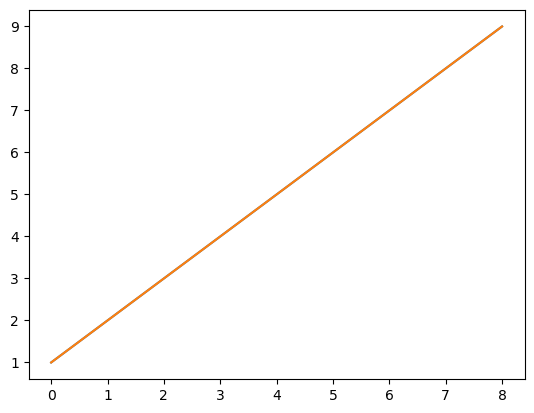

In [61]:
df['A'].plot()
plt.show()

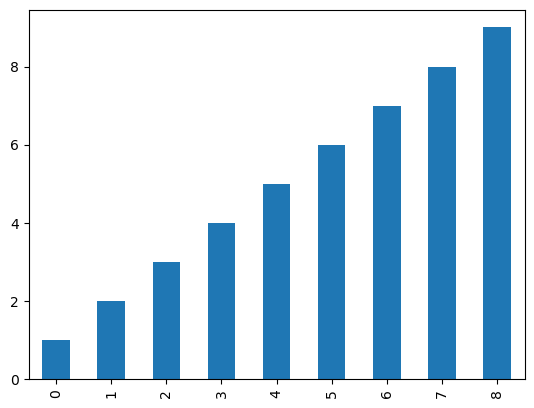

In [63]:
df['A'].plot(kind='bar')
plt.show()

ही झलक Pandas मधील सर्वात महत्त्वाच्या संकल्पनांचा आढावा घेते, परंतु ही लायब्ररी खूप समृद्ध आहे, आणि तुम्ही यामध्ये काय करू शकता याला मर्यादा नाही! आता या ज्ञानाचा उपयोग विशिष्ट समस्या सोडवण्यासाठी करूया.



---

**अस्वीकरण**:  
हा दस्तऐवज AI भाषांतर सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) चा वापर करून भाषांतरित करण्यात आला आहे. आम्ही अचूकतेसाठी प्रयत्नशील असलो तरी, कृपया लक्षात घ्या की स्वयंचलित भाषांतरांमध्ये त्रुटी किंवा अचूकतेचा अभाव असू शकतो. मूळ भाषेतील दस्तऐवज हा अधिकृत स्रोत मानला जावा. महत्त्वाच्या माहितीसाठी, व्यावसायिक मानवी भाषांतराची शिफारस केली जाते. या भाषांतराचा वापर केल्यामुळे उद्भवणाऱ्या कोणत्याही गैरसमज किंवा चुकीच्या अर्थासाठी आम्ही जबाबदार राहणार नाही.
